# 🦠 **COVID-19 Outbreak Analysis Based on the Relationship between Geographical Area (GTA) and Cause** 📊
## 📝 *Author*: Sunny Patel
## 📅 *Date*: October 20, 2023 - November 27, 2023
## 💻 *Environment*: Jupyter Core 5.3.2, Python 3.11.5, VS Code
## 📦 *Dependencies*: pandas (pip install pandas | matplotlib | numpy)



# Introduction

In this assignment, I am diving into an analysis of ongoing COVID-19 outbreaks in the Greater Toronto Area (GTA), Ontario. I'm using data from a government-licensed dataset called "Outbreaks by Public Health Unit (PHU)" to explore trends and patterns in these outbreaks. This data analysis integrates the essential aspects of the data science workflow (as required) and uses the libary pandas for data summarization, matplotlib to produce a cleanly formated bar graph for data visualization, matplotlib for the heatmap & numpy to arrange the heatmap data accordingly.

**Data Source**: The data comes from the Ontario government, giving you a unique opportunity to understand how COVID-19 outbreaks are affecting different regions in the GTA.

**Why COVID-19?**: I want to know which areas in the GTA have had the most ongoing outbreaks and what's causing them. This analysis will help you make sense of the local impact of the pandemic, especially considering I personally reside in Richmond Hill and go to school in Oshawa.

In [ ]:
# Assignment_1_Sunny_patel.ipynb
# @author Sunny Patel

# Start Date: October 20, 2023
# jupyter_core: 5.3.2 ~ Python version: 3.11.5
# dependancies used (pip install pandas | matplotlib | numpy)

'''Code used to show ongoing relatioship between active and ongoing COViD-19 breakouts based on 
   Region (in the GTA, Ontario) and Cause (where the ongoing breakout happened)

   CSV FILE INFORMATION:
   ---------------------
   Created: January 5, 2021
   December 1, 2022
   Filesize: 3.5 MiB < 5MB (62699 Lines of Data)
   Name: Outbreaks by Public Health Unit (PHU)
   License: Open Government Licence – Ontario

   Data Range Start: November 1, 2020
   Data Range End: December 1, 2022
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Dependencies have been initialized
**Now that I have set up the code with the required dependencies and proper PythonDoc formatting to work through this, we can continue through this analysis...**

**Please be sure to actually install these packages onto your desktop before running the rest of the code if the output is not saved in the notebook.**

In [2]:
# buffer the csv into interpreter (same way as shown in assignment pdf)
d = pd.read_csv("ongoing_outbreaks_phu.csv")

# remove rows that don't contain values
d.dropna(inplace=True)

# filter data for only recognizing GTA locations (constants in csv)
gta_phus = [
    "TORONTO",
    "PEEL REGION",
    "YORK REGION",
    "DURHAM REGION",
    "HALTON REGION",
]
gta_outbreaks = d[d["phu_name"].isin(gta_phus)]


# function to calculate ongoing breakouts
# adds up all instances of outbreaks based if phu_name and outbreak_group are the same
def sum_number_ongoing_outbreakss(df):
    return (
        df.groupby(["phu_name", "outbreak_group"])["number_ongoing_outbreaks"]
        .sum()
        .reset_index(name="number_ongoing_outbreaks")
    )

# Analyze the dataset programmically
**After loading the dataset into a pandas dataframe, I decided to go over the CSV and remove any inconsistencies (empty spaces) to ensure I can get an accurate analysis.**

**I defined a list of GTA locations that I want to be searching for so I can filter through the Dataframe to only include rows where the PHU name is in the list of regions**

In [4]:
# create summary table of PHU csv and call the sum function to populate data based on filters
outbreak_summary = (
    gta_outbreaks.groupby(["phu_name", "outbreak_group"])
    .apply(sum_number_ongoing_outbreakss)
    .reset_index(drop=True)
)

# update column names (for better output formatting)
outbreak_summary.rename(
    columns={
        "phu_name": "Region Name",
        "outbreak_group": "Cause",
        "number_ongoing_outbreaks": "     # of Ongoing Outbreaks (Based on Region and Group)",
    },
    inplace=True,
)

# output summary table
print(
    "***NOVEMBER 1, 2020 - DECEMBER 1, 2022***\n-----------------------------------------"
)
print("Outbreak Summary:\n")
display(outbreak_summary)
# print(outbreak_summary.to_string(index=False, justify='right')) #use this to print it in plain text.

***NOVEMBER 1, 2020 - DECEMBER 1, 2022***
-----------------------------------------
Outbreak Summary:



,Region Name,Cause,# of Ongoing Outbreaks (Based on Region and Group)
0,DURHAM REGION,1 Congregate Care,7611
1,DURHAM REGION,2 Congregate Living,2849
2,DURHAM REGION,3 Education,3144
3,DURHAM REGION,4 Workplace,2686
4,DURHAM REGION,5 Recreational,541
5,DURHAM REGION,6 Other/Unknown,187
6,HALTON REGION,1 Congregate Care,5215
7,HALTON REGION,2 Congregate Living,2381
8,HALTON REGION,3 Education,1351
9,HALTON REGION,4 Workplace,2221


# Tabular Summary Table

**Now that I've sorted through the data, I created the summary table and called the sum function I created earlier to add up all the different types of causes per region to get a final numerical value for the relationship I am analyzing.**

**Updating the output names is essential to a user-friendly experience because using variable names as labels makes the output look very unclean.**

**I then decided to use the display() function to give the output which gives a nice grey-to-grey GTG tabular format whereas using a print statement is not user-friendly, and the output gets truncated.**

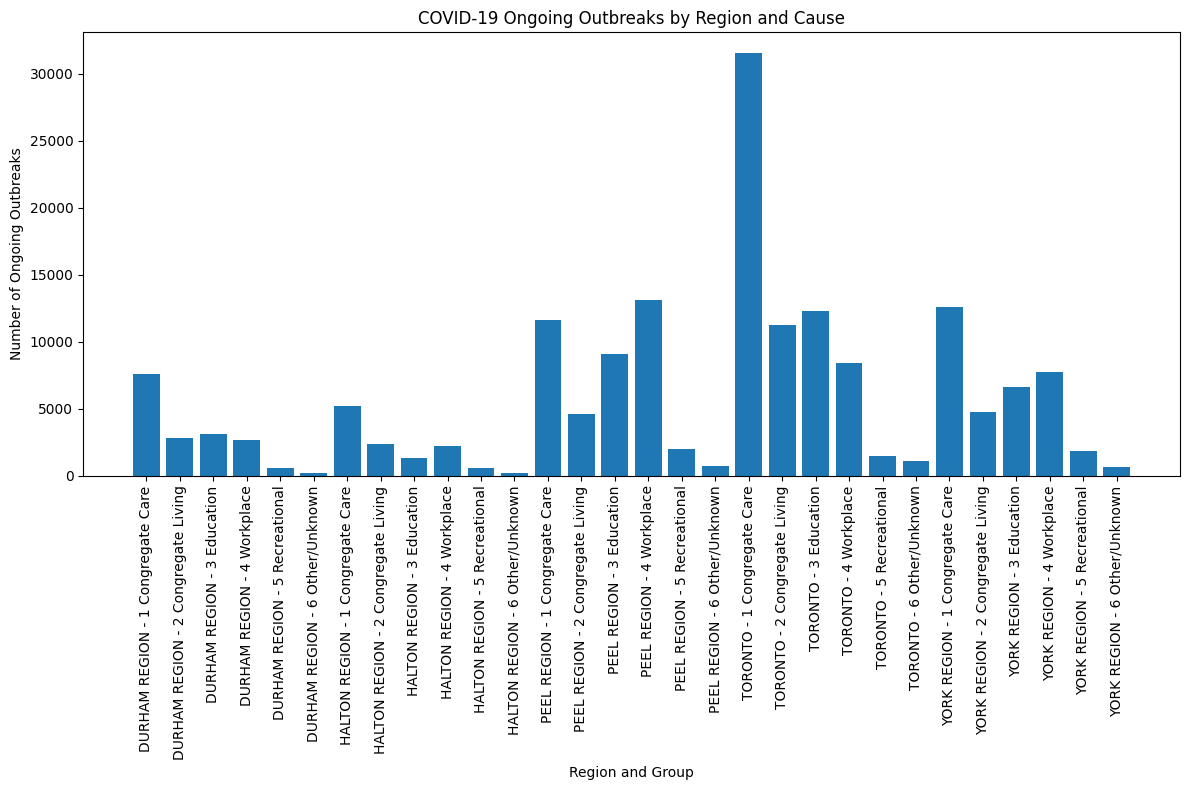

In [5]:
# plot data using matplotlib
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# create bar plot
plt.bar(
    range(len(outbreak_summary)),
    outbreak_summary["     # of Ongoing Outbreaks (Based on Region and Group)"],
)

# customize x-axis labels
plt.xticks(
    range(len(outbreak_summary)),
    outbreak_summary["Region Name"] + " - " + outbreak_summary["Cause"],
    rotation=90,
)
plt.xlabel("Region and Group")
plt.ylabel("Number of Ongoing Outbreaks")
plt.title("COVID-19 Ongoing Outbreaks by Region and Cause")

# show bar graph plot
plt.tight_layout()  # shrink to fit
plt.show()

# Bar Graph to visualize relationship between Outbreak Group & Cause to the number of infected individuals.

**I have taken my sorted data and displayed a nice bar graph to visualize the relationship in a basic form factor.**

**I initialized the figure size to 12 x 8 which fit all the necessary data. I then displayed the plot**

**Finally, I customized the x-axis labels to ensure that the Region & Group Names are all able to fit. This worked out perfectly at a 90 degree angle. I also implemented the plt.tight_layout() function to ensure everything scales to the aspect ratio of 12:8**

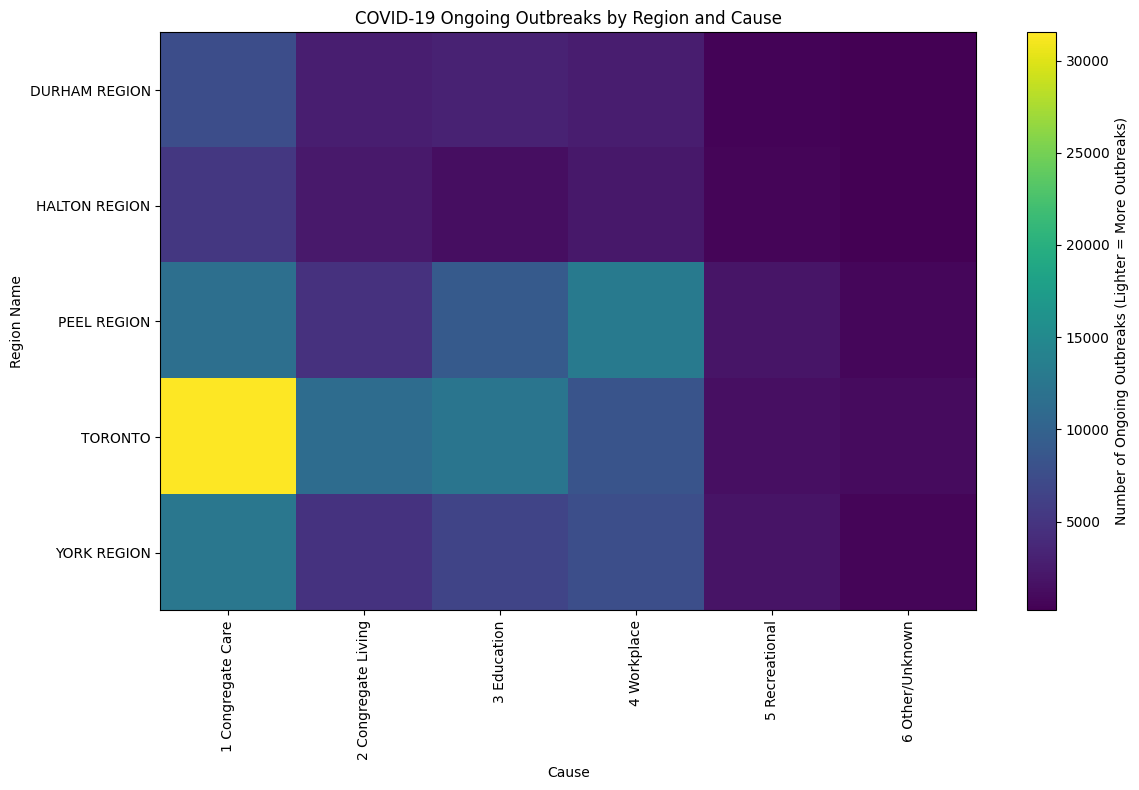

In [6]:
# Convert data to a pivot table for creating a heatmap
heatmap_data = outbreak_summary.pivot(
    index="Region Name",
    columns="Cause",
    values="     # of Ongoing Outbreaks (Based on Region and Group)",
).fillna(0)

# Create the heatmap graph using matplotlib and numpy to arrange data
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap="viridis", aspect="auto", interpolation="none")
plt.colorbar(label="Number of Ongoing Outbreaks (Lighter = More Outbreaks)")
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel("Cause")
plt.ylabel("Region Name")
plt.title("COVID-19 Ongoing Outbreaks by Region and Cause")

# Show heatmap plot
plt.tight_layout()  # Shrink to fit
plt.show()

# Heatmap to represent the same relationship as the bar graph above in a more appealing format.

**I used the colour scheme map viridis for its wide colour spectrum to make it easier for the human eye to see where areas have more outbreaks. I've also added a legend on the right side to indicate which shades associate with # of outbreaks.**

**What's good about the fact that I've preorganized my data is that I easily converted it to a pivot table for generating my heatmap.**

**After creating the pivot table, I used matplotlib once again to generate a 12 x 8 plot with its respective x and y axis labels.**

---
---
---

 ##  CSV FILE INFORMATION:
 
This Python project is meant to analyze the ongoing relationship between active and ongoing COVID-19 outbreaks based on regions in the Greater Toronto Area (GTA) and the specific causes of these outbreaks. It uses data from the "Outbreaks by Public Health Unit (PHU)" dataset as mentioned earlier, with the following information (can also be found in the header of the python code above...):

- 📅 **Creation Date**: January 5, 2021
- 🔄 **Last Update Date**: December 1, 2022
- 📁 **File Size**: 3.5 MiB
- 📝 **Name**: Outbreaks by Public Health Unit (PHU)
- 📜 **License**: Open Government Licence – Ontario
- 📅 **Data Range Start**: November 1, 2020
- 📅 **Data Range End**: December 1, 2022

---

## Data Preparation

1. **Data Loading**: The code starts by importing the necessary libraries, including 🐼 `pandas` for data processing and 📊 `matplotlib` for visualization.

2. **CSV Data Import**: It reads the COVID-19 outbreak data from the 'ongoing_outbreaks_phu.csv' file into a Pandas DataFrame.

3. **Data Cleaning**: Rows with missing values are removed using dropna() func. from the dataset to ensure consistency and that the output is formatted correctly.

4. **Data Filtering**: The code filters the data to include only the public health units (PHUs) within the Greater Toronto Area (GTA). These PHUs are 'TORONTO', 'PEEL REGION', 'YORK REGION', 'DURHAM REGION', and 'HALTON REGION'.

---

## Data Analysis

5. **Ongoing Outbreak Calculation**: I made a function called  `sum_number_ongoing_outbreaks` and it's defined to calculate the total number of ongoing outbreaks based on the matching 'phu_name' and 'outbreak_group'.

6. **Summary Table Creation**: A summary table is generated, grouping the data by 'phu_name' and 'outbreak_group' and applying the previously defined custom function to calculate the number of ongoing outbreaks for each combination.

7. **Column Renaming**: Column names are different from variable names for better output formatting to 'Region Name', 'Cause', and 'Number of Ongoing Outbreaks'.

8. **Output Summary Table**: A summary table is displayed, providing insights into the number of ongoing outbreaks based on region and cause.

---

## Data Visualization

9. **Bar Plot Generation**: To provide a visual representation of the relationships, a bar plot is created. It displays the number of ongoing outbreaks for each combination of region and cause.

10. **Heatmap Plot Generation**: To provide a more appealing representation of the relationships, a 2D heatmap is plotted using numpy and matplotlib. It displays the number of ongoing outbreaks for each combination of region and cause.

11. **Plot Presentation**: The plots are presented with titles and labels for a clear understanding of the data. It is displayed at the end of every runtime, after the CSV is finished being filtered through.

---

## 📊 **Analysis Summary (In simple non-programming English)**

- The analysis has provided us with a comprehensive summary of the ongoing COVID-19 outbreaks.
- I've grouped the data by region and cause, and the total number of ongoing outbreaks has been calculated for each combination.
- The results are presented in both a tabular and graphical form.

### **Data Loading**

My analysis relied on a dataset named "Outbreaks by Public Health Unit (PHU)," which was obtained on December 1, 2022. This dataset, sourced under the Open Government Licence – Ontario, provides information on COVID-19 outbreaks across the GTA. It holds data from November 1, 2020, to December 1, 2022. To use this dataset in my analysis, I loaded it into the Python environment (IDE) using Pandas.

### **Data Cleaning**

Before proceeding with the analysis, I conducted a data cleaning process. This step involved removing any rows with missing or incomplete data, ensuring that the dataset was free from any inconsistencies that could affect my findings. This step is crucial to maintain the accuracy of my analysis.

### **Data Filtering**

To focus my analysis on the Greater Toronto Area (GTA), I filtered the dataset to include only the public health units (PHUs) that are part of the GTA. This subset of data, which includes Toronto, Peel Region, York Region, Durham Region, and Halton Region, formed the basis for my subsequent analysis.

### **Data Aggregation**

I then aggregated the data by two key factors: region (PHU name) and the cause of the outbreak (outbreak group). This step involved summing the number of ongoing outbreaks for each unique combination of region and cause. This aggregation process helped me gain insights into the distribution of outbreaks based on these two variables.

### **Data Plotting**
    
Finally, I plotted the aggregated data in a bar graph to visualize the relationship between the region and the cause of the outbreak. This step helped me identify patterns and trends in the data, which I then used to draw conclusions about the ongoing COVID-19 outbreaks in the GTA. In addition to the bar plot, I also created a heatmap using the 'viridis' colormap to provide a more detailed visual representation of the relationships between regions and causes based on the number of ongoing outbreaks.

**Bar Graph**
- I defined the x-axis of the bar chart to represent the various regions in the GTA, combined with their respective outbreak causes.
- The y-axis represents the number of ongoing outbreaks, providing a visual representation of the scale of the outbreak counts.

**Heatmap**
- The x-axis of the heatmap represents the causes of outbreaks.
- The y-axis represents the regions in the GTA.
- The color of each cell in the heatmap represents the number of ongoing outbreaks for the corresponding combination of region and cause. You can find the colour spectrum on the right side of the plot with the correlated colour/per number.

---

# 🗣️ **Discussion** 💬

In the previous sections, I performed an analysis of the ongoing COVID-19 outbreaks in the Greater Toronto Area (GTA) based on regions and their specific causes. Let's dive into the numbers, graphs, and tables to understand the implications of our findings:

---

## 🌆 **Region and Cause Relationship**

The most prominent insight comes from the relationship between the region and the specific causes of outbreaks:

- **Toronto (TORONTO) Region**: It exhibits the highest number of ongoing outbreaks, particularly in categories like 'Congregate Care' and 'Workplace.'
- **Peel Region (PEEL REGION)**: It closely follows Toronto in the number of ongoing outbreaks, with a significant presence in 'Congregate Care' and 'Congregate Living.'
- **York Region (YORK REGION)**: York shows a similar pattern to Peel, with 'Congregate Care' and 'Education' being evident.
- **Durham Region (DURHAM REGION)**: Durham has a distinctive pattern with higher 'Workplace' and 'Recreational' outbreaks in comparison to most of the other regions (discluding Toronto).
- **Halton Region (HALTON REGION)**: Halton Region has a more balanced distribution amongst various outbreak causes from what's provided in the CSV.

---

## 🤔 **Interpretation**

What does all this data mean?

1. **Priority Areas**: Understanding the regions with the highest ongoing outbreak counts helps prioritize healthcare resources and intervention strategies. Regions like Toronto and Peel might require more attention, dollar funding, and resources due to their higher numbers etc...

2. **Specific Causes**: Identifying the primary causes of outbreaks in each region is vital for tailored intervention (fitted for the specific cause). For example, regions with a high 'Workplace' outbreak count may need stricter workplace safety measures such as WHMIS (Ontario Regulations) and better PPE (Protective equipment) I've noticed from my time working at the hospital, a lot if COVID-19 cases were caused due to interacting with the patients regularly, in return, causing a workplace outbreak.

3. **Pattern Recognition**: Recognizing patterns, such as Durham Region's distinctive 'Recreational' outbreaks, can aid in crafting region-specific policies and guidelines.

Overall, this analysis provides valuable insights for public health authorities and policymakers to address and manage ongoing COVID-19 outbreaks effectively. It helps in allocating resources where they are most needed and tailoring response strategies to specific regional characteristics based on recorded statistics.

---

The combination of data analysis and visualization serves as a powerful tool in a human understanding the dynamics between COVID-19 outbreaks and allows people to implement proactive measures/safeguard strategies for public health and safety.



# 📚 **References** 📦

To perform this analysis, the following data sources and packages were utilized (mentioned numerously throughout this analysis, but required formally as part of requirements):

---

## 📂 **Data Source**

- **Ontario COVID-19 Outbreaks Data**: The primary data source for this analysis is the Ontario COVID-19 Outbreaks dataset, which can be accessed [here](https://data.ontario.ca/dataset/ontario-covid-19-outbreaks-data/resource/36048cc1-3c47-48ff-a49f-8c7840e32cc2). The data spans a significant timeframe, starting from November 1, 2020, to December 1, 2022. It provides critical information about COVID-19 outbreaks, including their causes and locations.

- **Direct CSV Download**: The specific CSV file used in this analysis can be directly accessed and downloaded from [this link](https://data.ontario.ca/datastore/dump/36048cc1-3c47-48ff-a49f-8c7840e32cc2?bom=True).

---

## 📦 **Packages, Documentation & Instructions**

To process and visualize the data, the following Python packages were employed:

- 🐼 **pandas**: This library was used for data manipulation and formatting, enabling cleaning and organizing the dataset. [Pandas Documentation](https://pandas.pydata.org/docs/)

- 📊 **matplotlib**: This library was used to visualize the final cleaned, and filtered data in a humanly form-factor. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

- 🧮 **numpy**: This library was utilized for efficiently arranging and processing the data that was later visualized in the heatmap. [NumPy Documentation](https://numpy.org/doc/stable/)

**To install the required libraries, open your command line interface (CMD on Windows, Terminal on Mac), and use the following commands:**

- pip install pandas
- pip install matplotlib
- pip install numpy


---

# 🤖 **NLP/LLM Enhancement with ChatGPT**

This specific section was written by ChatGPT 3.5-turbo (it was required to mention where natural language processing was used so...)

In the process of creating this analysis, I leveraged Natural Language Processing (NLP/LLM), specifically with the assistance of ChatGPT, to add an interactive and engaging touch to my notebook. The goal was to make the content more appealing and user-friendly.

### 🎉 **Emojis for Visual Appeal**

To make the notebook visually appealing and less bland, I incorporated cool emojis throughout the text. Emojis provide a unique way to express emotions, convey ideas, and create a fun and interactive atmosphere, enhancing the overall reading experience.

### ✨ **Alignment and Spacing Improvement**

NLP, with the help of ChatGPT, also played a crucial role in fixing spacing and alignment issues that occurred during the creation of the notebook. ChatGPT's ability to analyze and generate text allowed me to ensure that the content was well-organized and presented in a clean and readable format.

This integration of NLP not only adds a touch of creativity to the notebook but also contributes to a more user-friendly and engaging experience for the readers.

### 💭 **Prompts Used**

1. Here's my (...) section for my project. Just add emojis wherever u think is good to make my MD less bland.
2. Look over all of this text (...), fix any spacing and spelling issues. output me the final markdown. DO NOT CHANGE ANY PRE-WRITTEN TEXT I HAVE WROTE
3. Look at my selected heatmap code: (...) the coolwarm heatmap schema (cmap) looks weird and so does the hot one. use one that shows the heatmap in a nice way (CHATGPT used viridis heatmap schema)
4. provide me with the pip install command that works on both cmd and terminal for mac for pandas numpy and matplotlib, also give me the documentation in a this link href paramater format

---